In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy
from astropy import wcs
import spectral_cube
from astropy import units as u
import aplpy
from spectral_cube import SpectralCube
import regions
from astropy import wcs
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.coordinates import Angle, SkyCoord
from regions import CircleSkyRegion
from regions import PixCoord
import os
import math as m
import pandas as pd

import warnings
warnings.simplefilter('ignore')

In [26]:
raw={}
filename=['etacar_CO(2-1).fits','etacar-13co32.fits','etacar-13co21.fits','etacar-c18o21.fits','etacar-ci.fits','etacar-co32.fits','Cycle7_GR_OT_07_0028-CI492_final.lmv.fits',
         'Cycle7_GR_OT_07_0028-CO87_final.lmv.fits','Cycle7_GR_OT_07_0028-NII_final.lmv.fits','Cycle7_GR_OT_07_0028-OI63_final.lmv.fits','carina.HI.fits']

for i in range(len(filename)):
    cube=SpectralCube.read(filename[i])
    raw[i]=cube
    #print(raw[i])

In [3]:
line=[]
for i in range(len(filename)-1):
    print(raw[i].header['LINE'],raw[i].header['BUNIT'],raw[i].header['RESTFRQ'],raw[i].header['CDELT3'])
    line.append(raw[i].header['LINE'])
line.append('HI')

CO(2-1) K (Tmb) 230538000000.0 500.0
13CO32 K (Tmb) 330587960000.0 500.0
13co21 K (Tmb) 220398677000.0 500.0
c18o21 K (Tmb) 219560357000.0 500.0
CI K (Tmb) 492160700000.0 500.0
co32 K (Tmb) 345795990000.0 500.0
CI492_L K (Tmb) 492160.651 -1040.850043297
CO(8-7)_U K (Tmb) 921799.7 952.6682496071
NII_U K (Tmb) 1461133.8 -1001.698493958
OI_63_L K (Tmb) 4744777.49 1079.640865326


In [4]:
reg_no=['Region 1','Region 2','Region 3','Region 4','Region 5','Region 6','Region 7']
region_list = regions.Regions.read('region_list.reg')

# GAUSSIAN FITTING

In [13]:
amps

{'CO(2-1)': {'Region 1': [8.743365905964358, 0.6587310963213855],
  'Region 2': [6.083239530576088, 2.0098146143246574, 0.6349469498682406],
  'Region 3': [4.769614598960756],
  'Region 4': [1.9737804504910759, 1.8147579167139385, 0.46434690981077625],
  'Region 5': [3.048516866680607],
  'Region 6': [1.2576573851188877, 1.053712955381035, 0.8679232760552021],
  'Region 7': [2.886997387280773]},
 '13CO32': {'Region 1': [3.374404469401674],
  'Region 2': [0.6273854357989729, 0.4009406955037827, 0.14902339426426706],
  'Region 3': [0.36124805902682955],
  'Region 4': [0.6217079973200869],
  'Region 5': [1.0044665432071016],
  'Region 6': [0.28695757861060706],
  'Region 7': [0.4413593582134825]},
 '13co21': {'Region 1': [3.7136032177331573, 0.07202437509759332],
  'Region 2': [1.0640901064630517, 0.11387159503769982, 0.2168089901590503],
  'Region 3': [0.56661376735585],
  'Region 4': [0.5033316754138007, 0.22985103783224825],
  'Region 5': [0.9667669908258703],
  'Region 6': [0.19346608

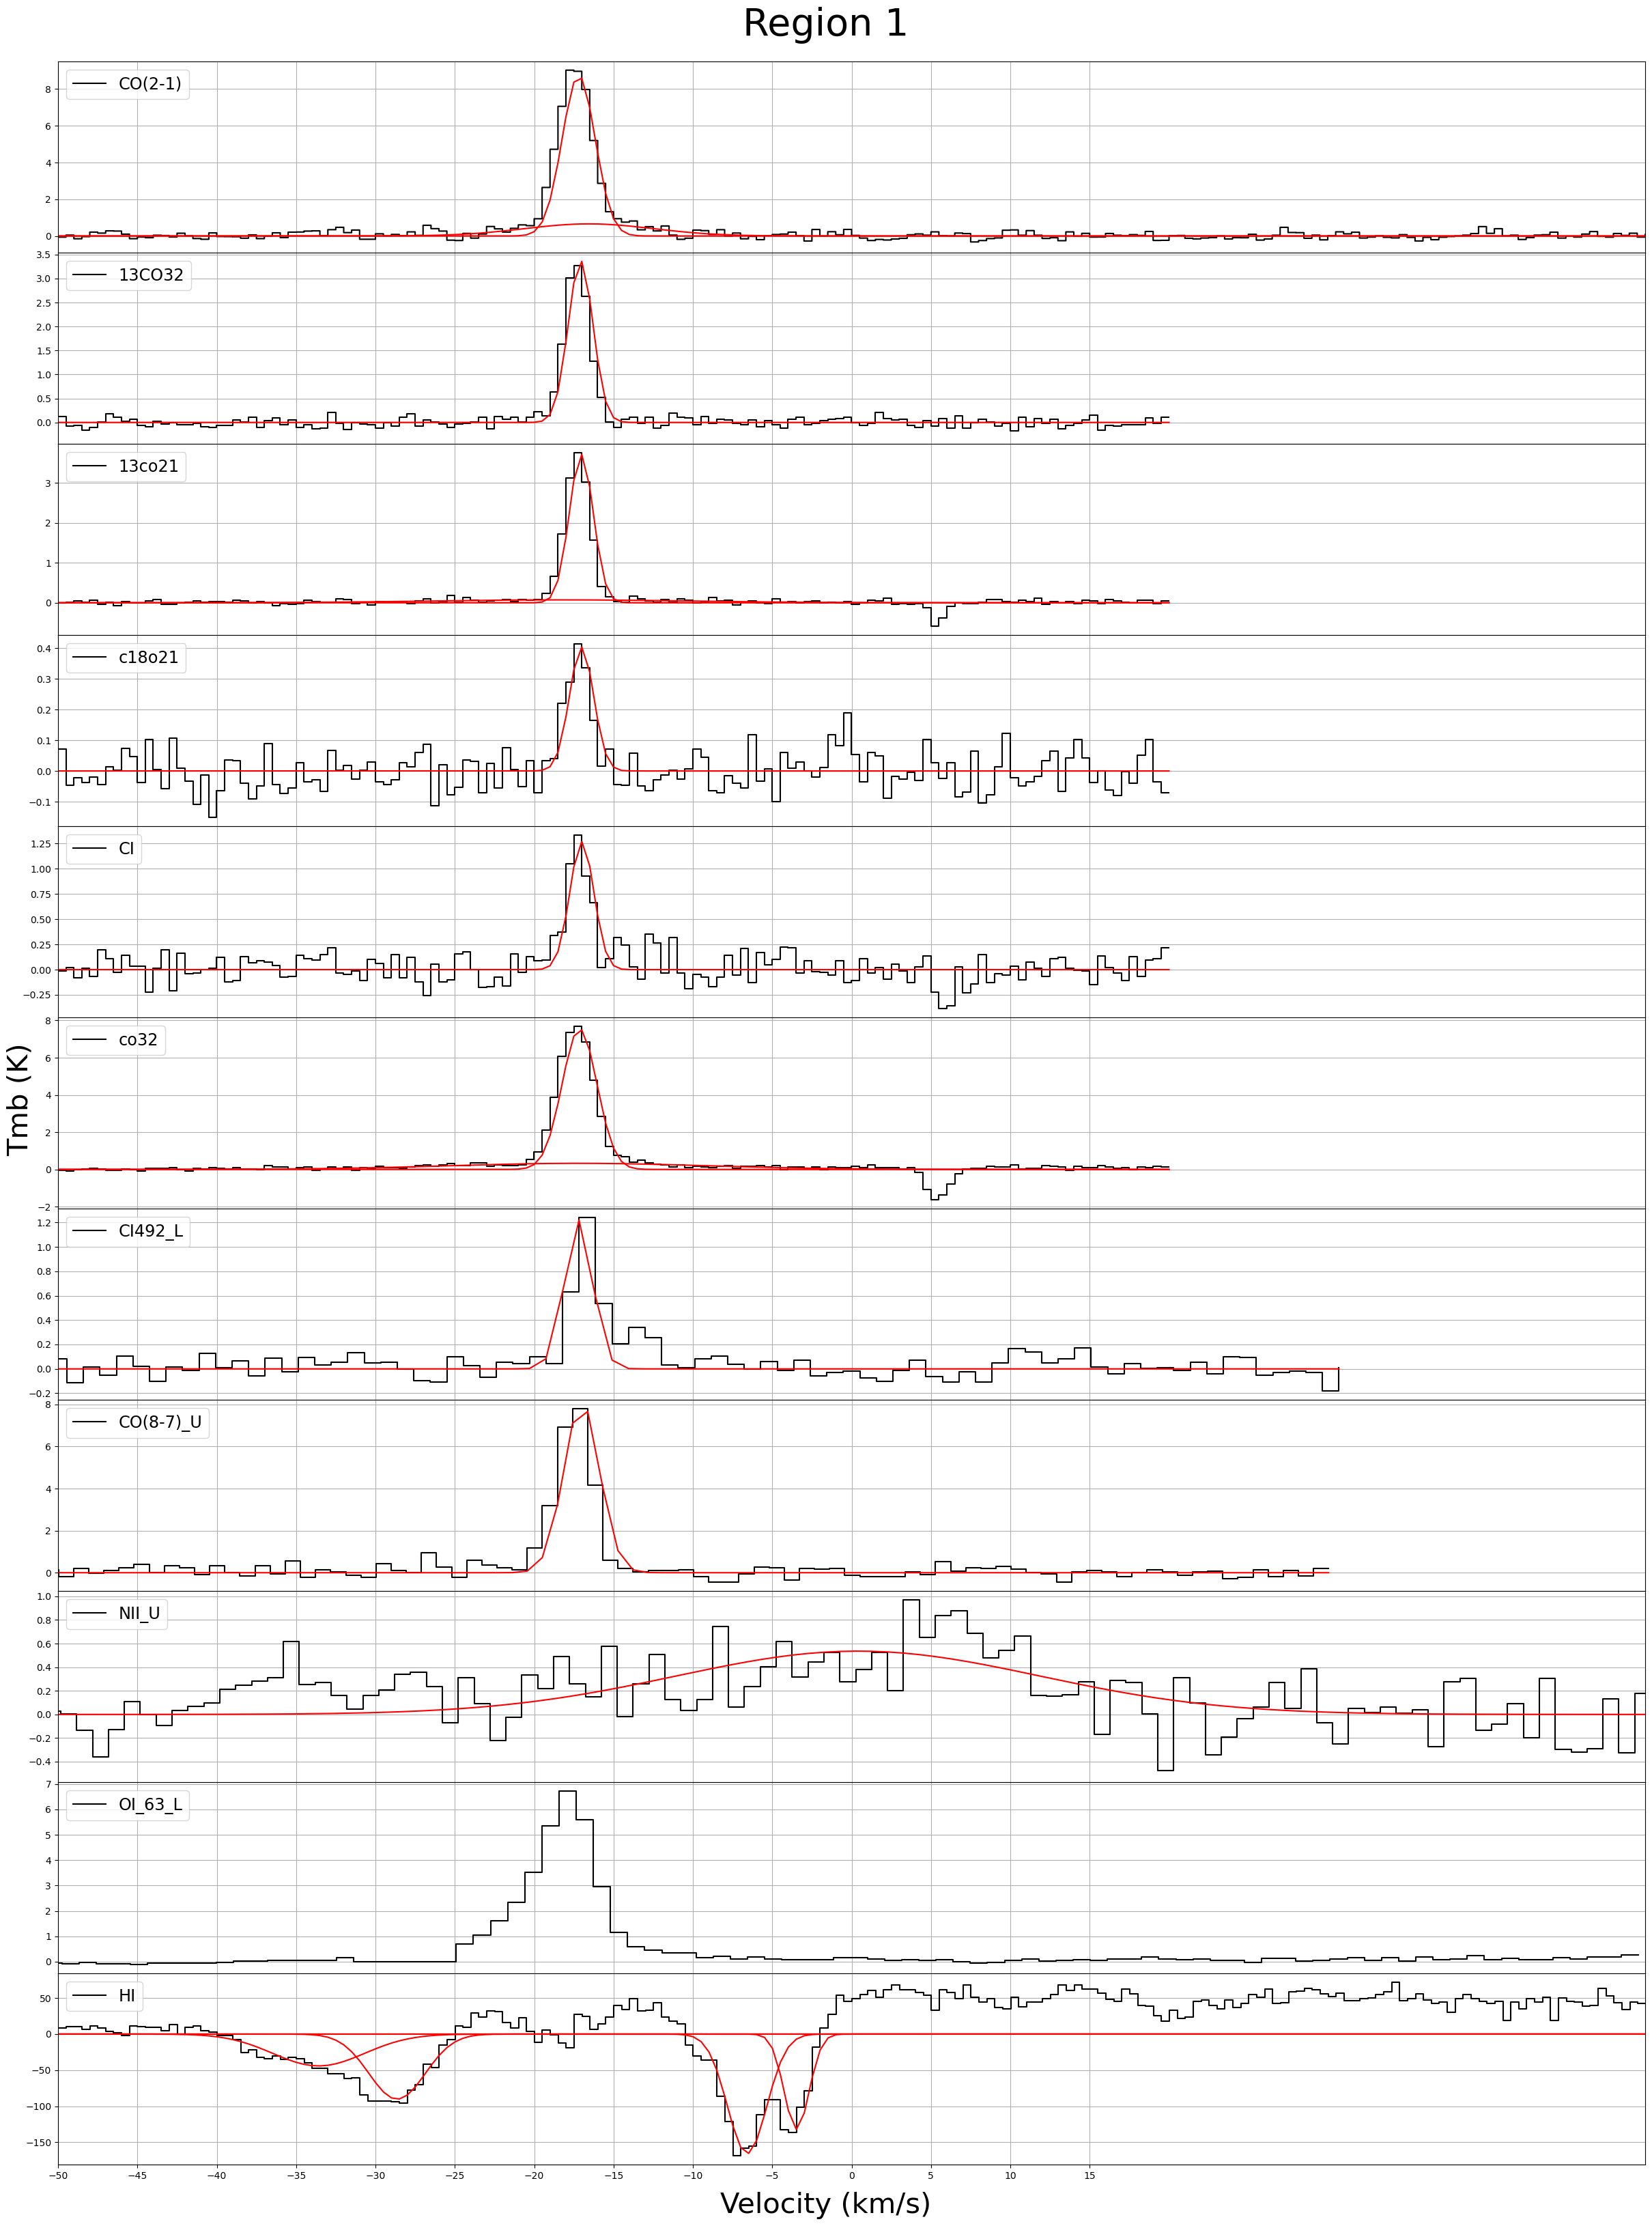

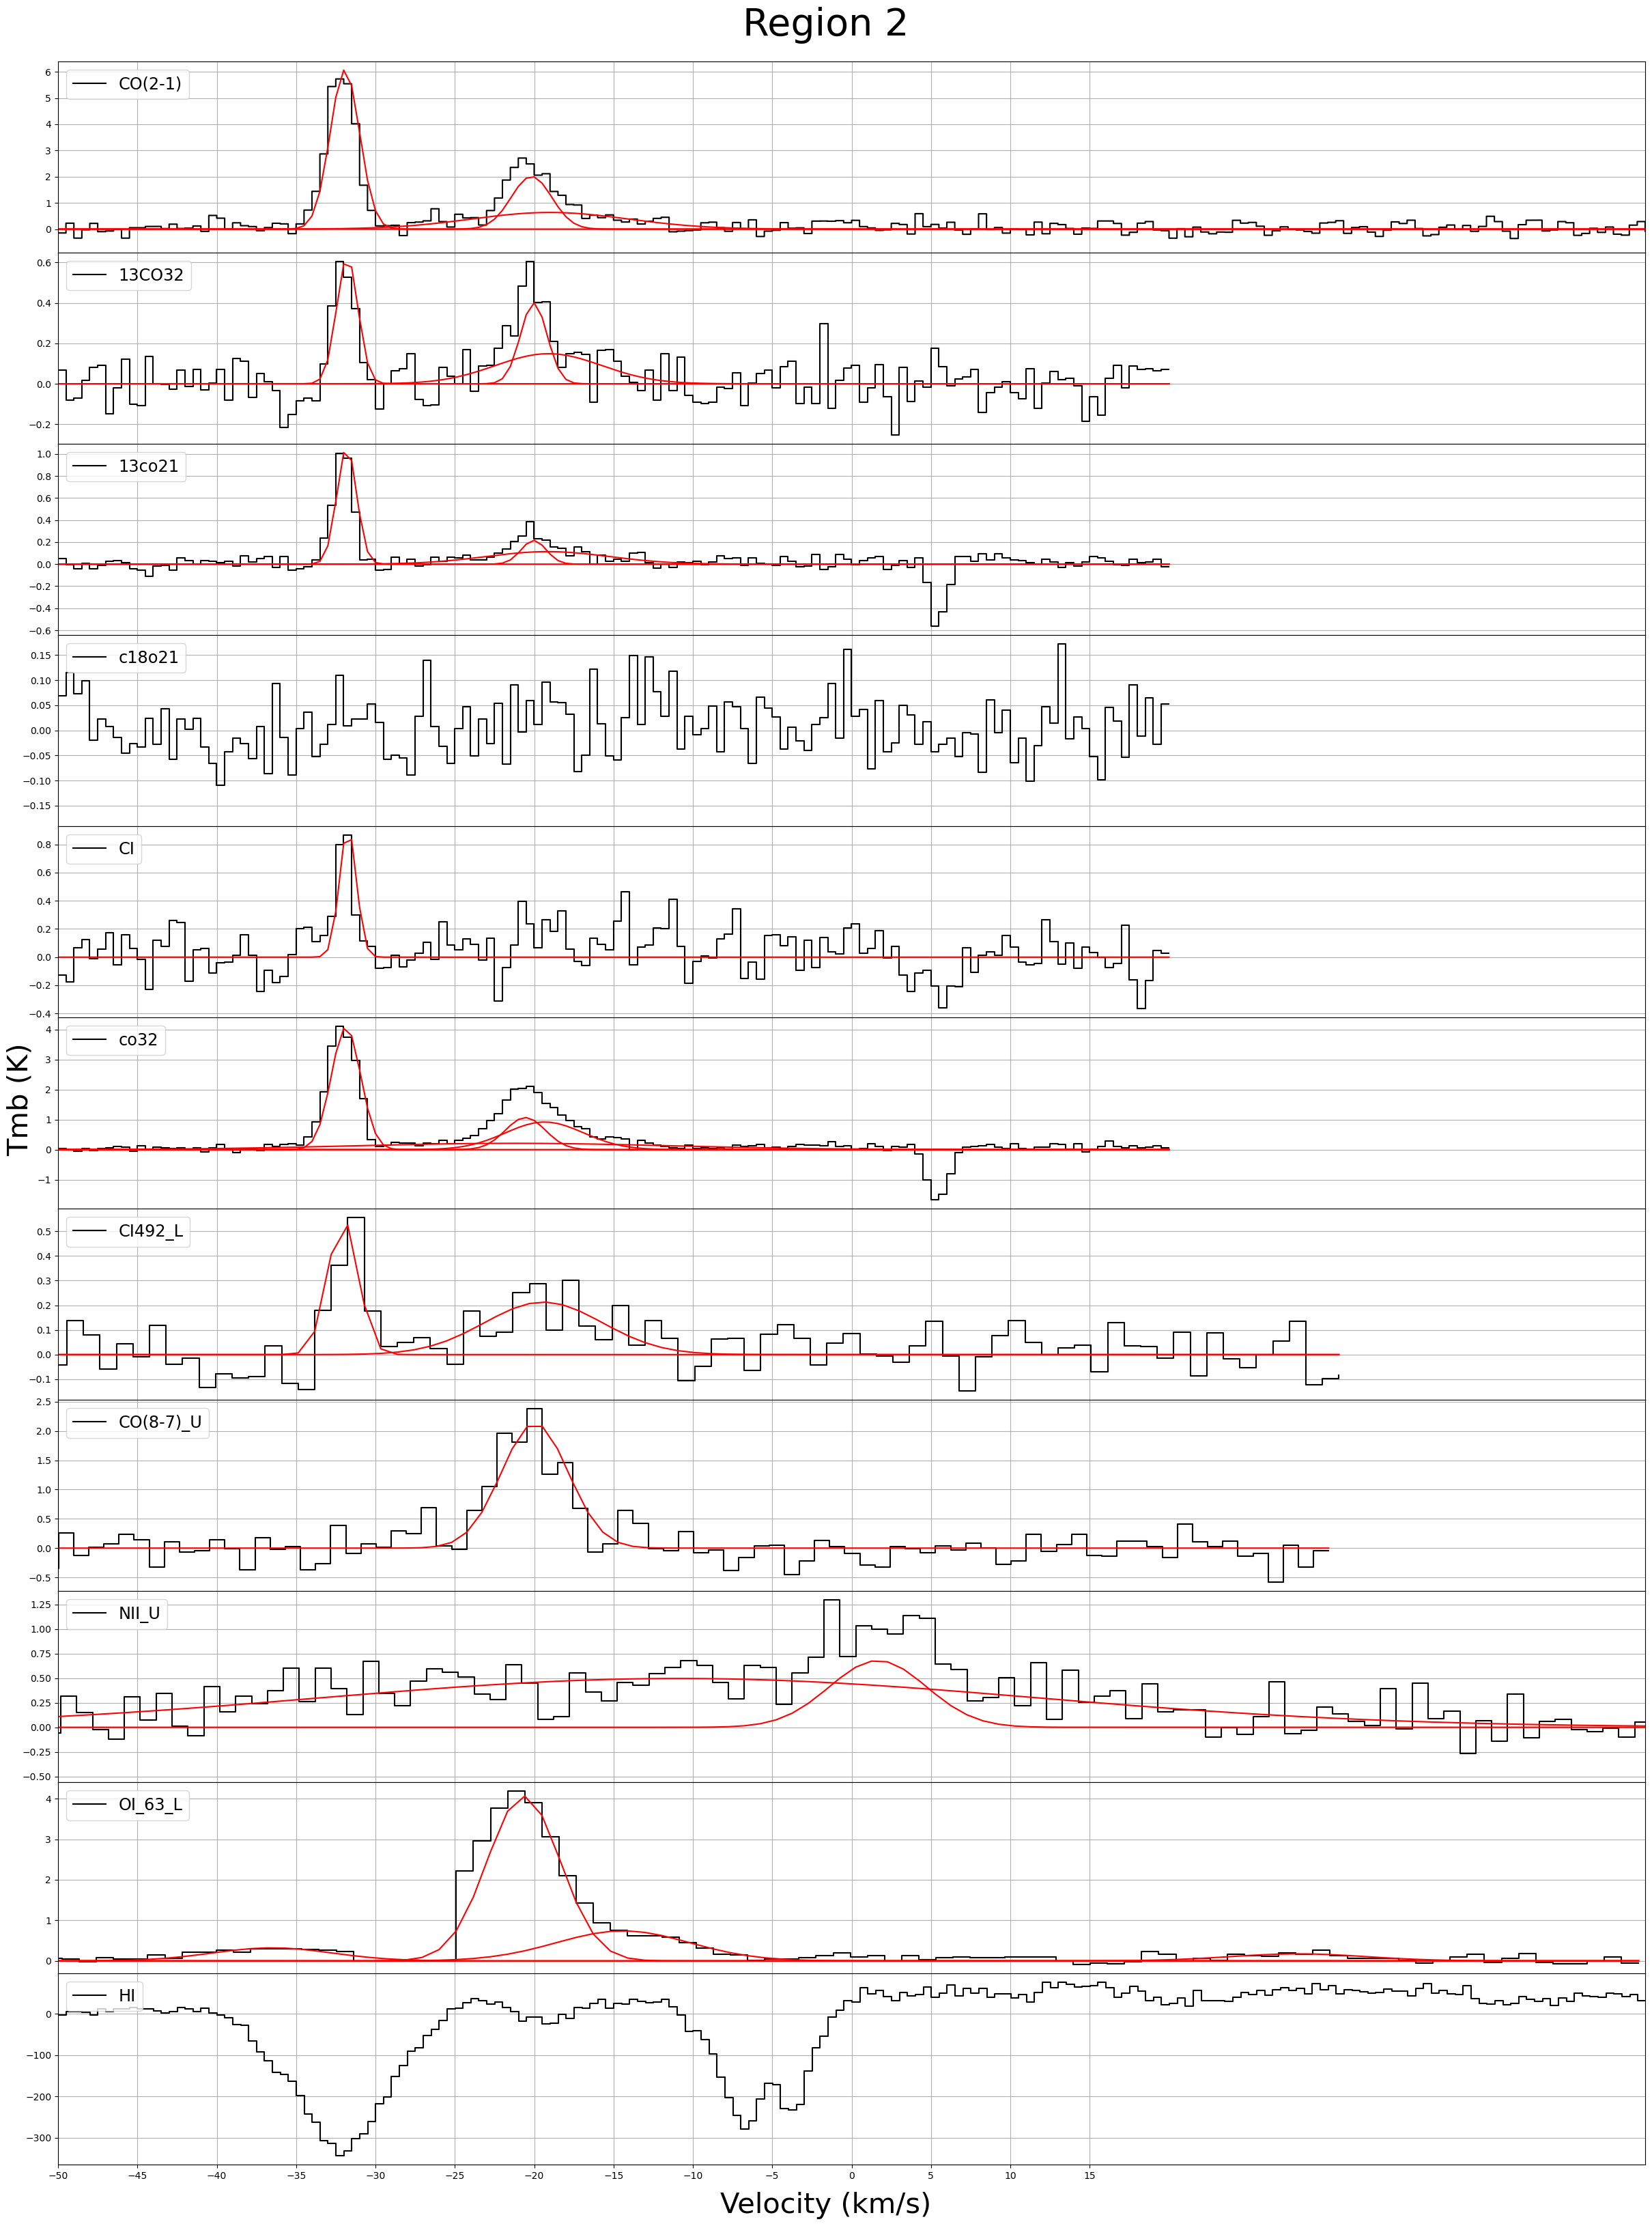

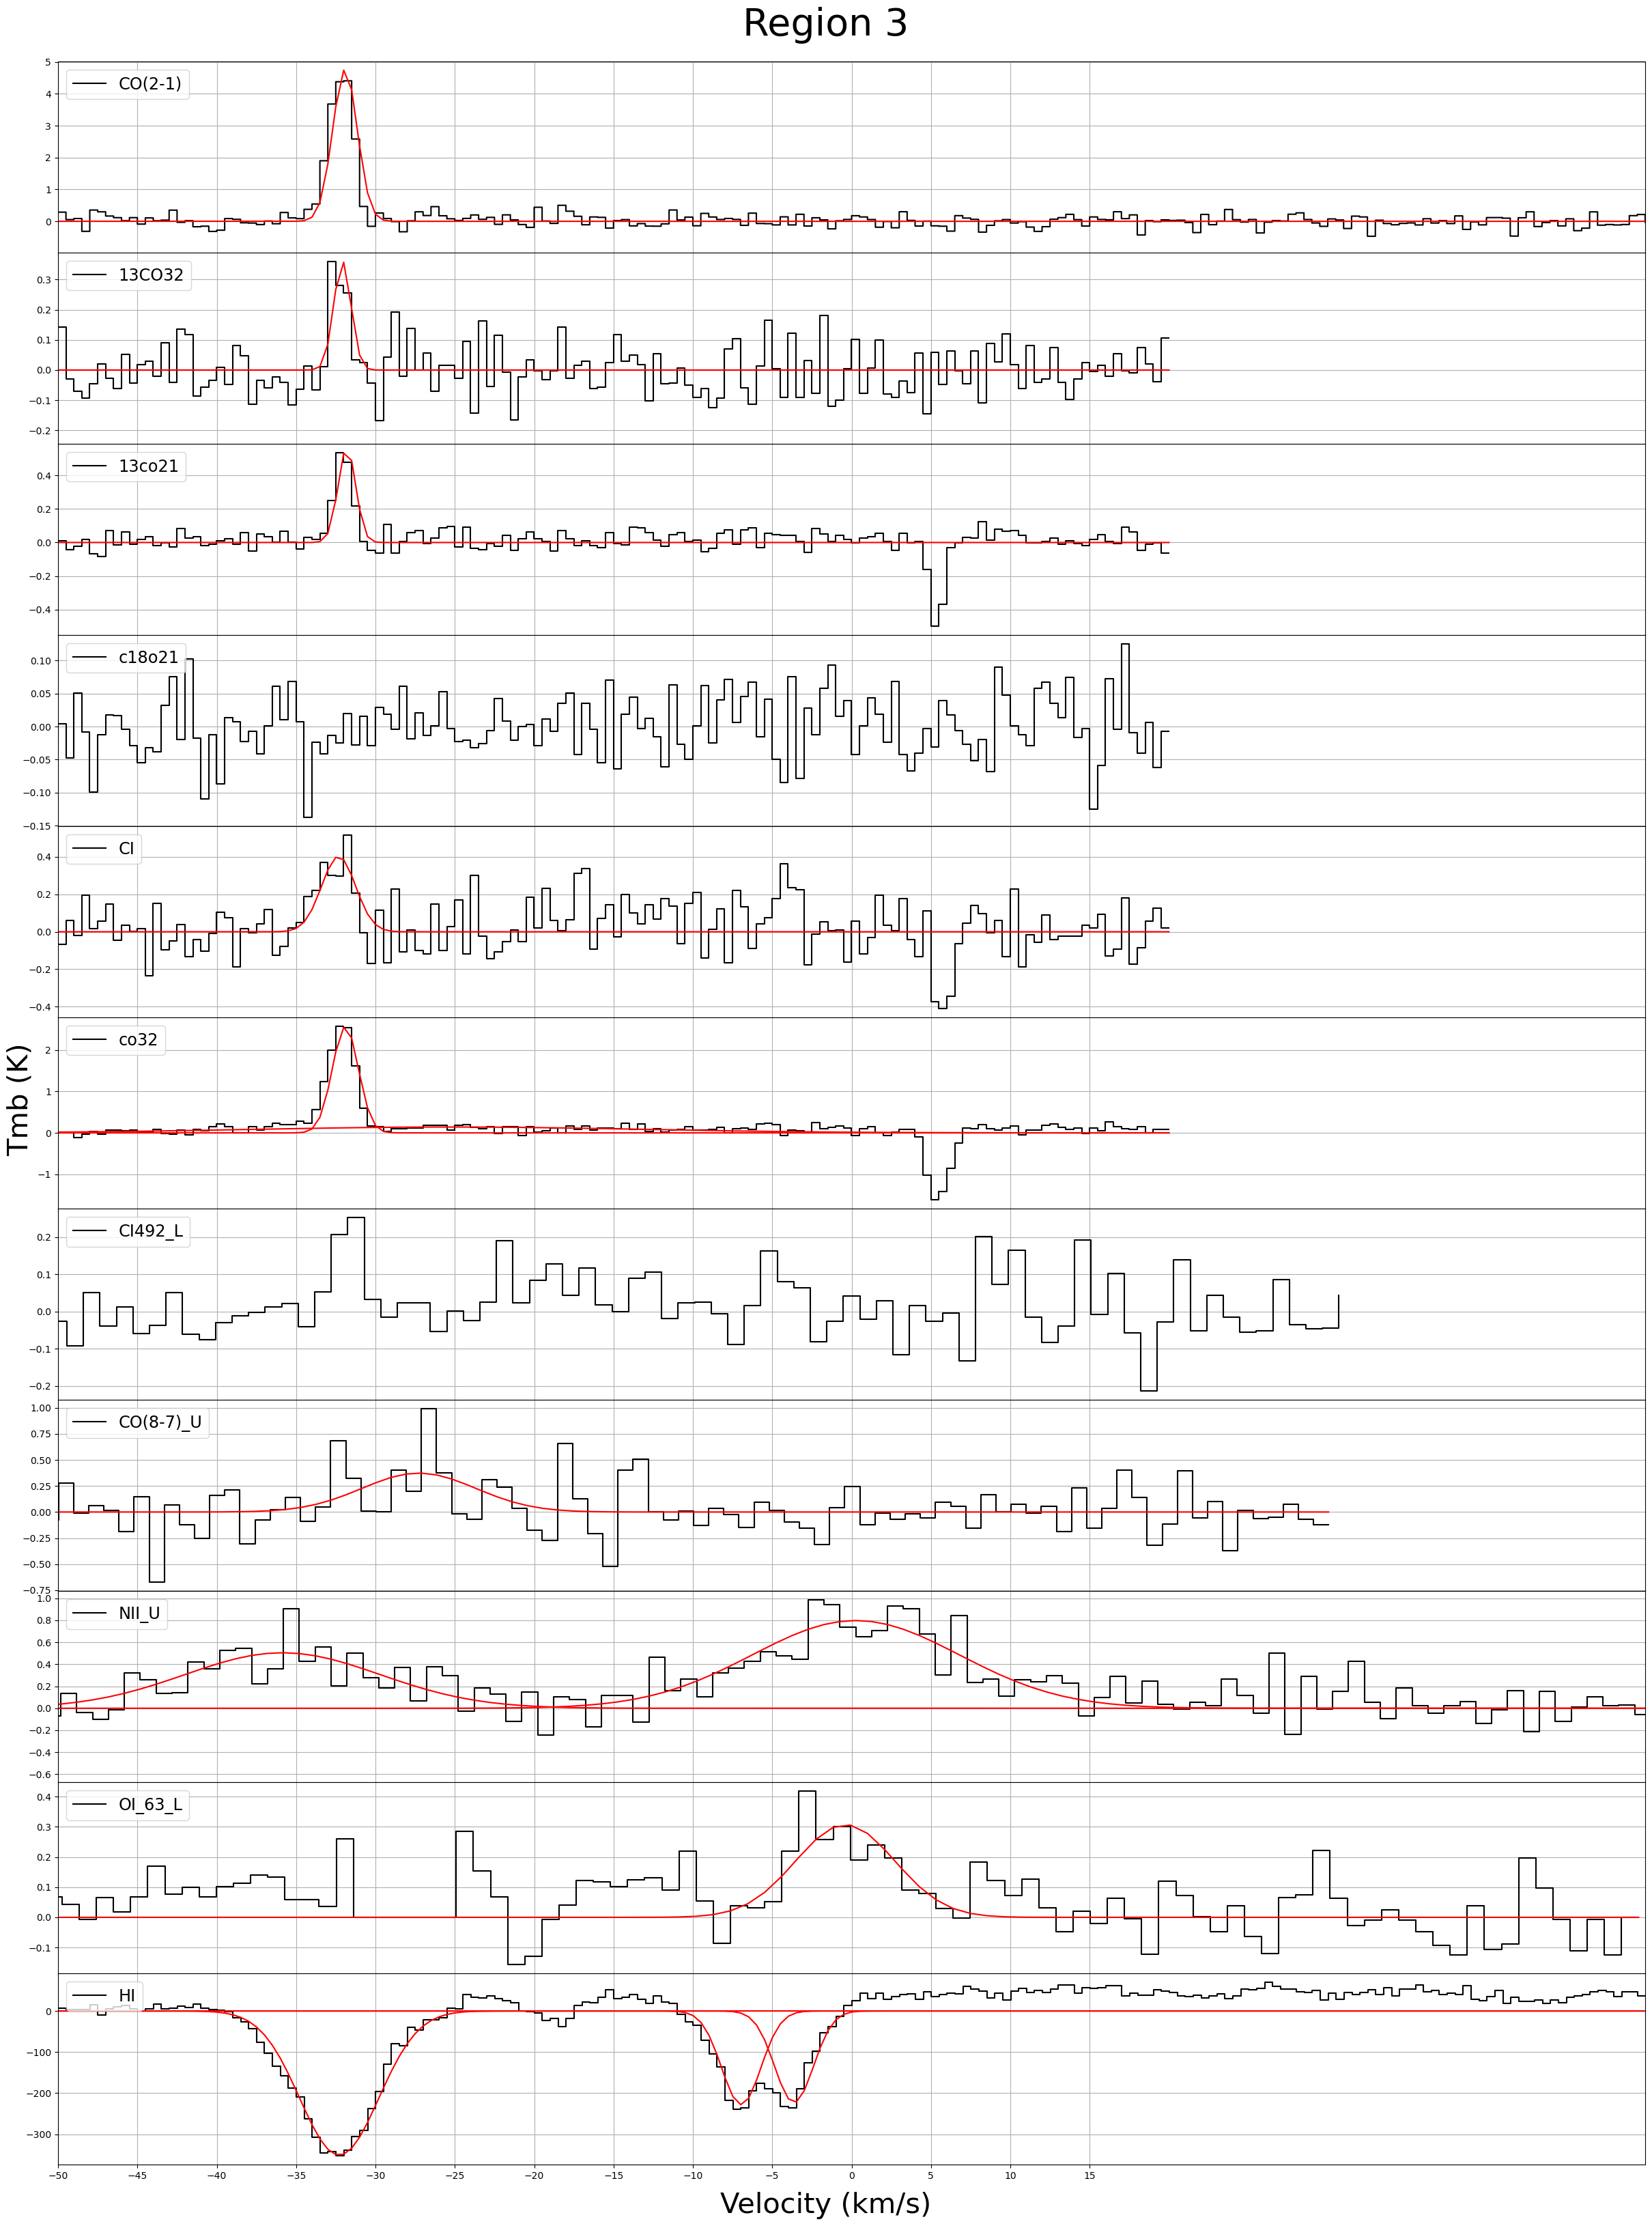

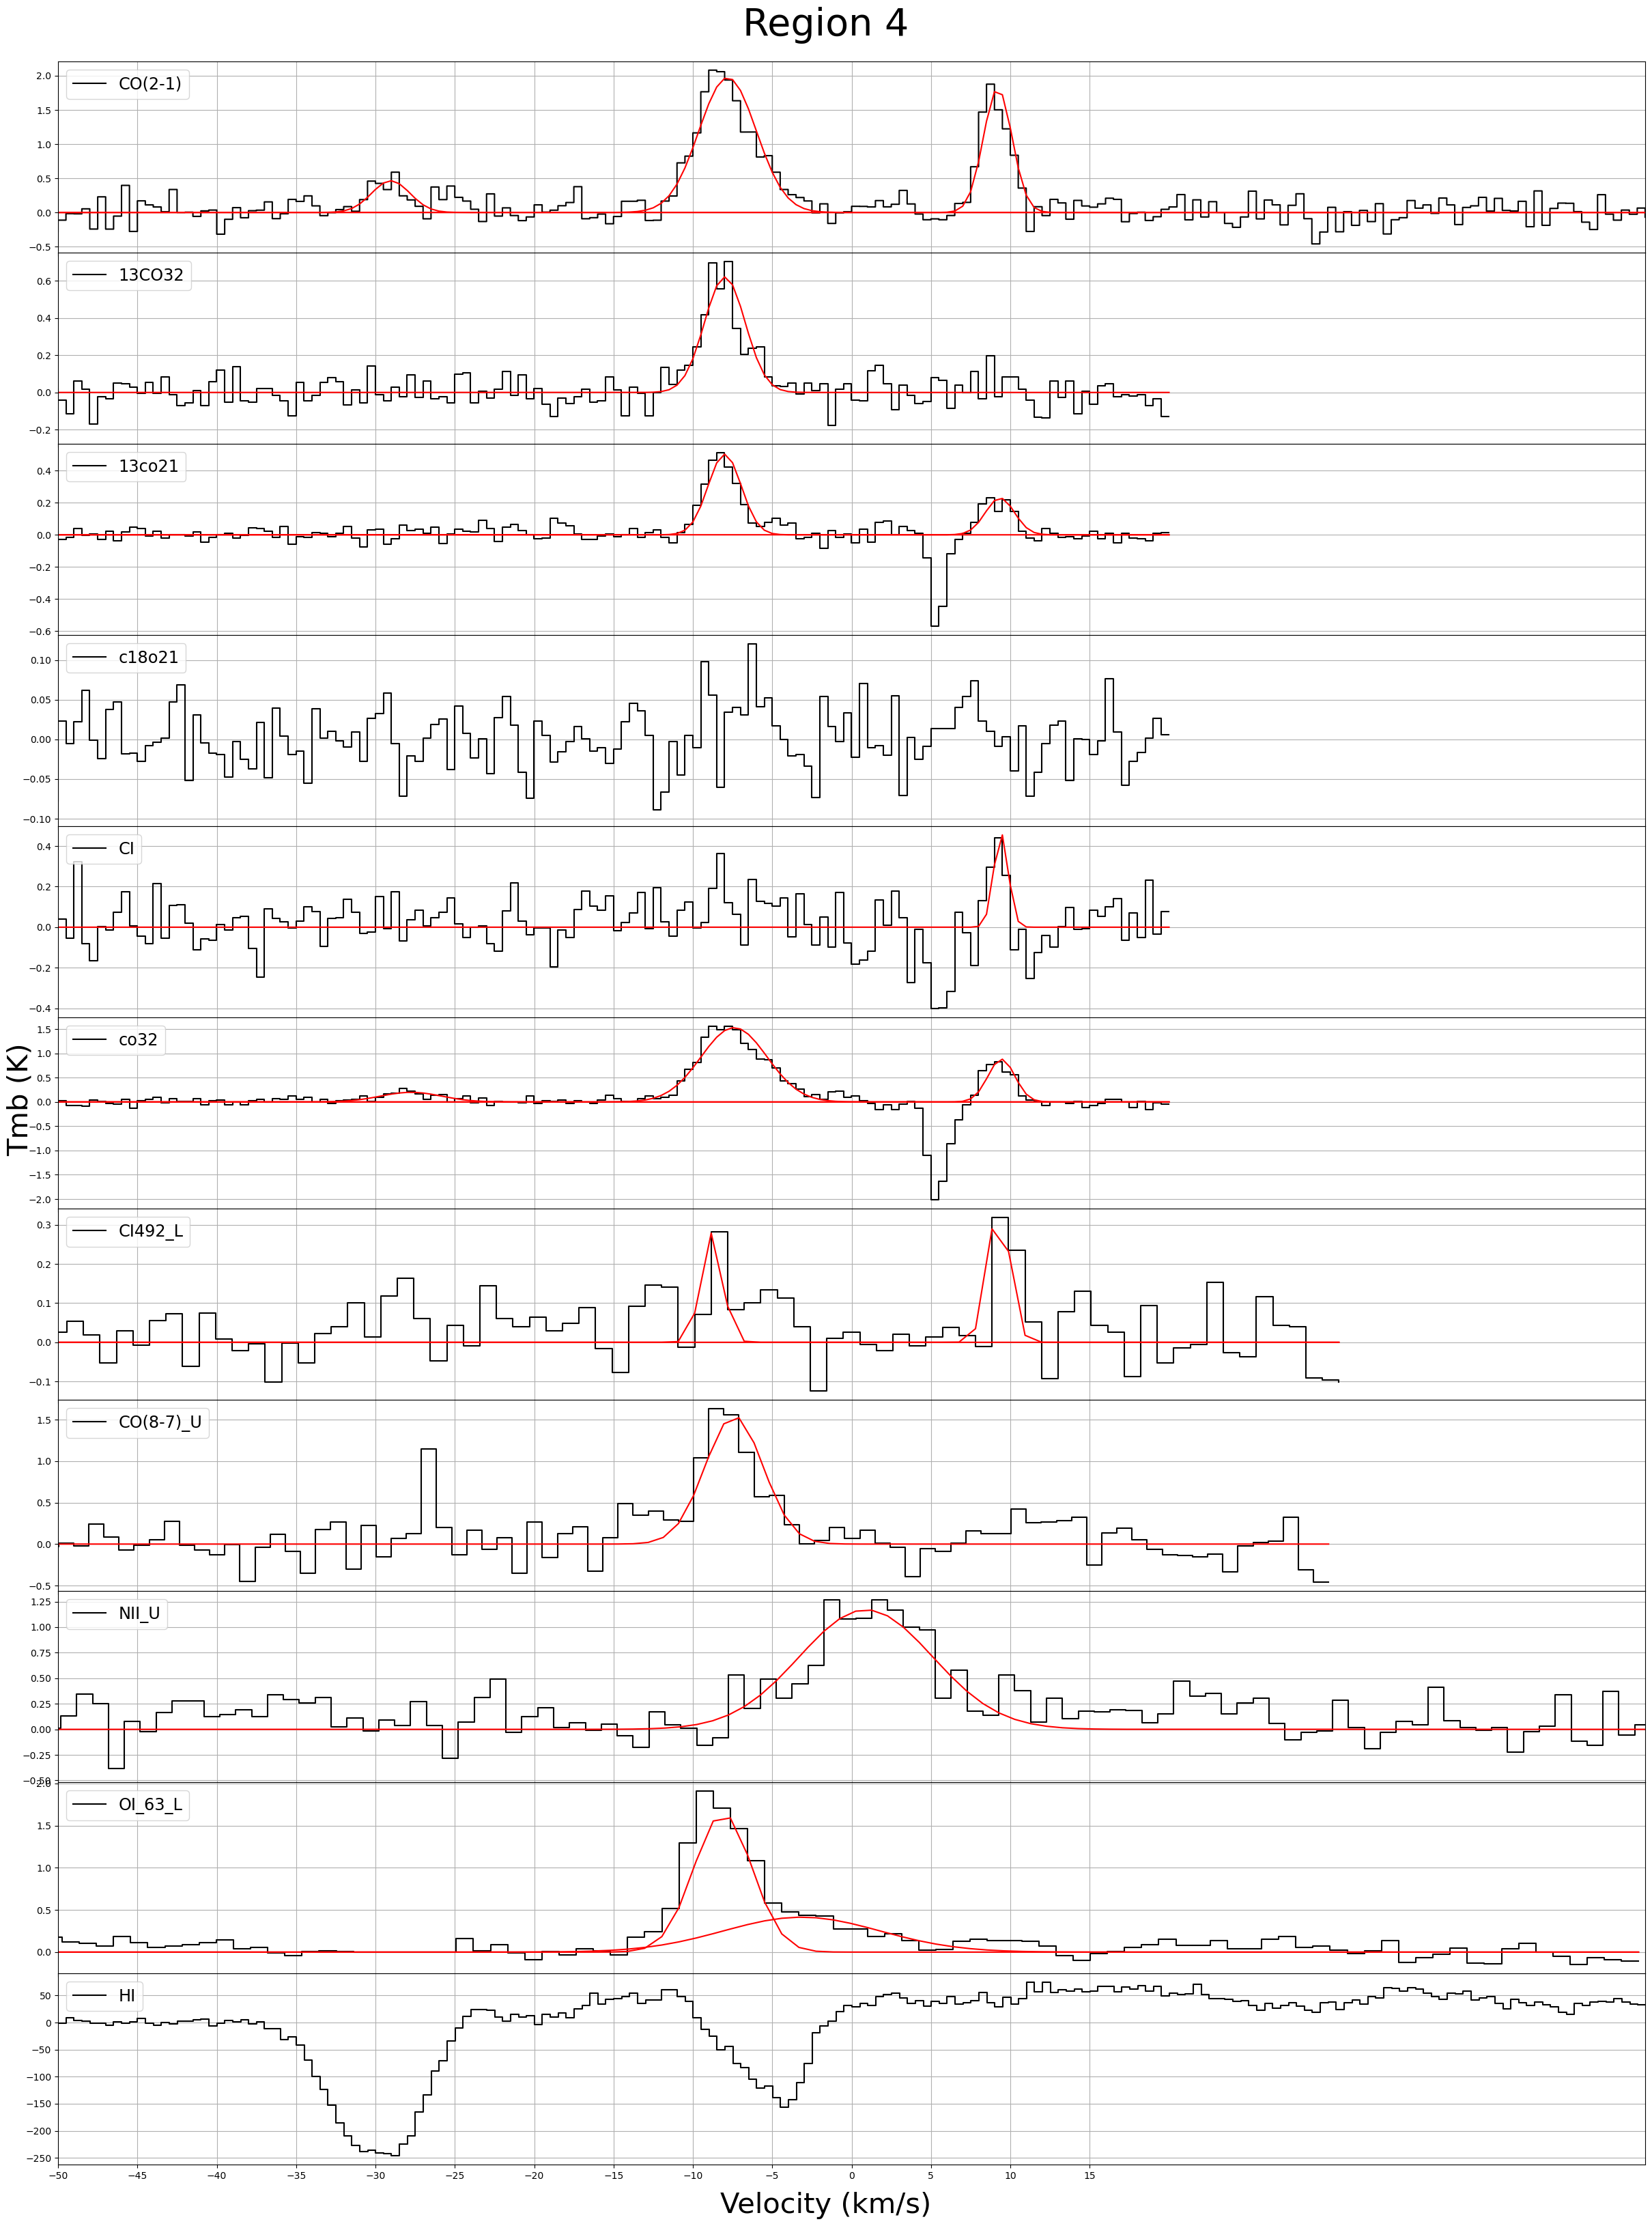

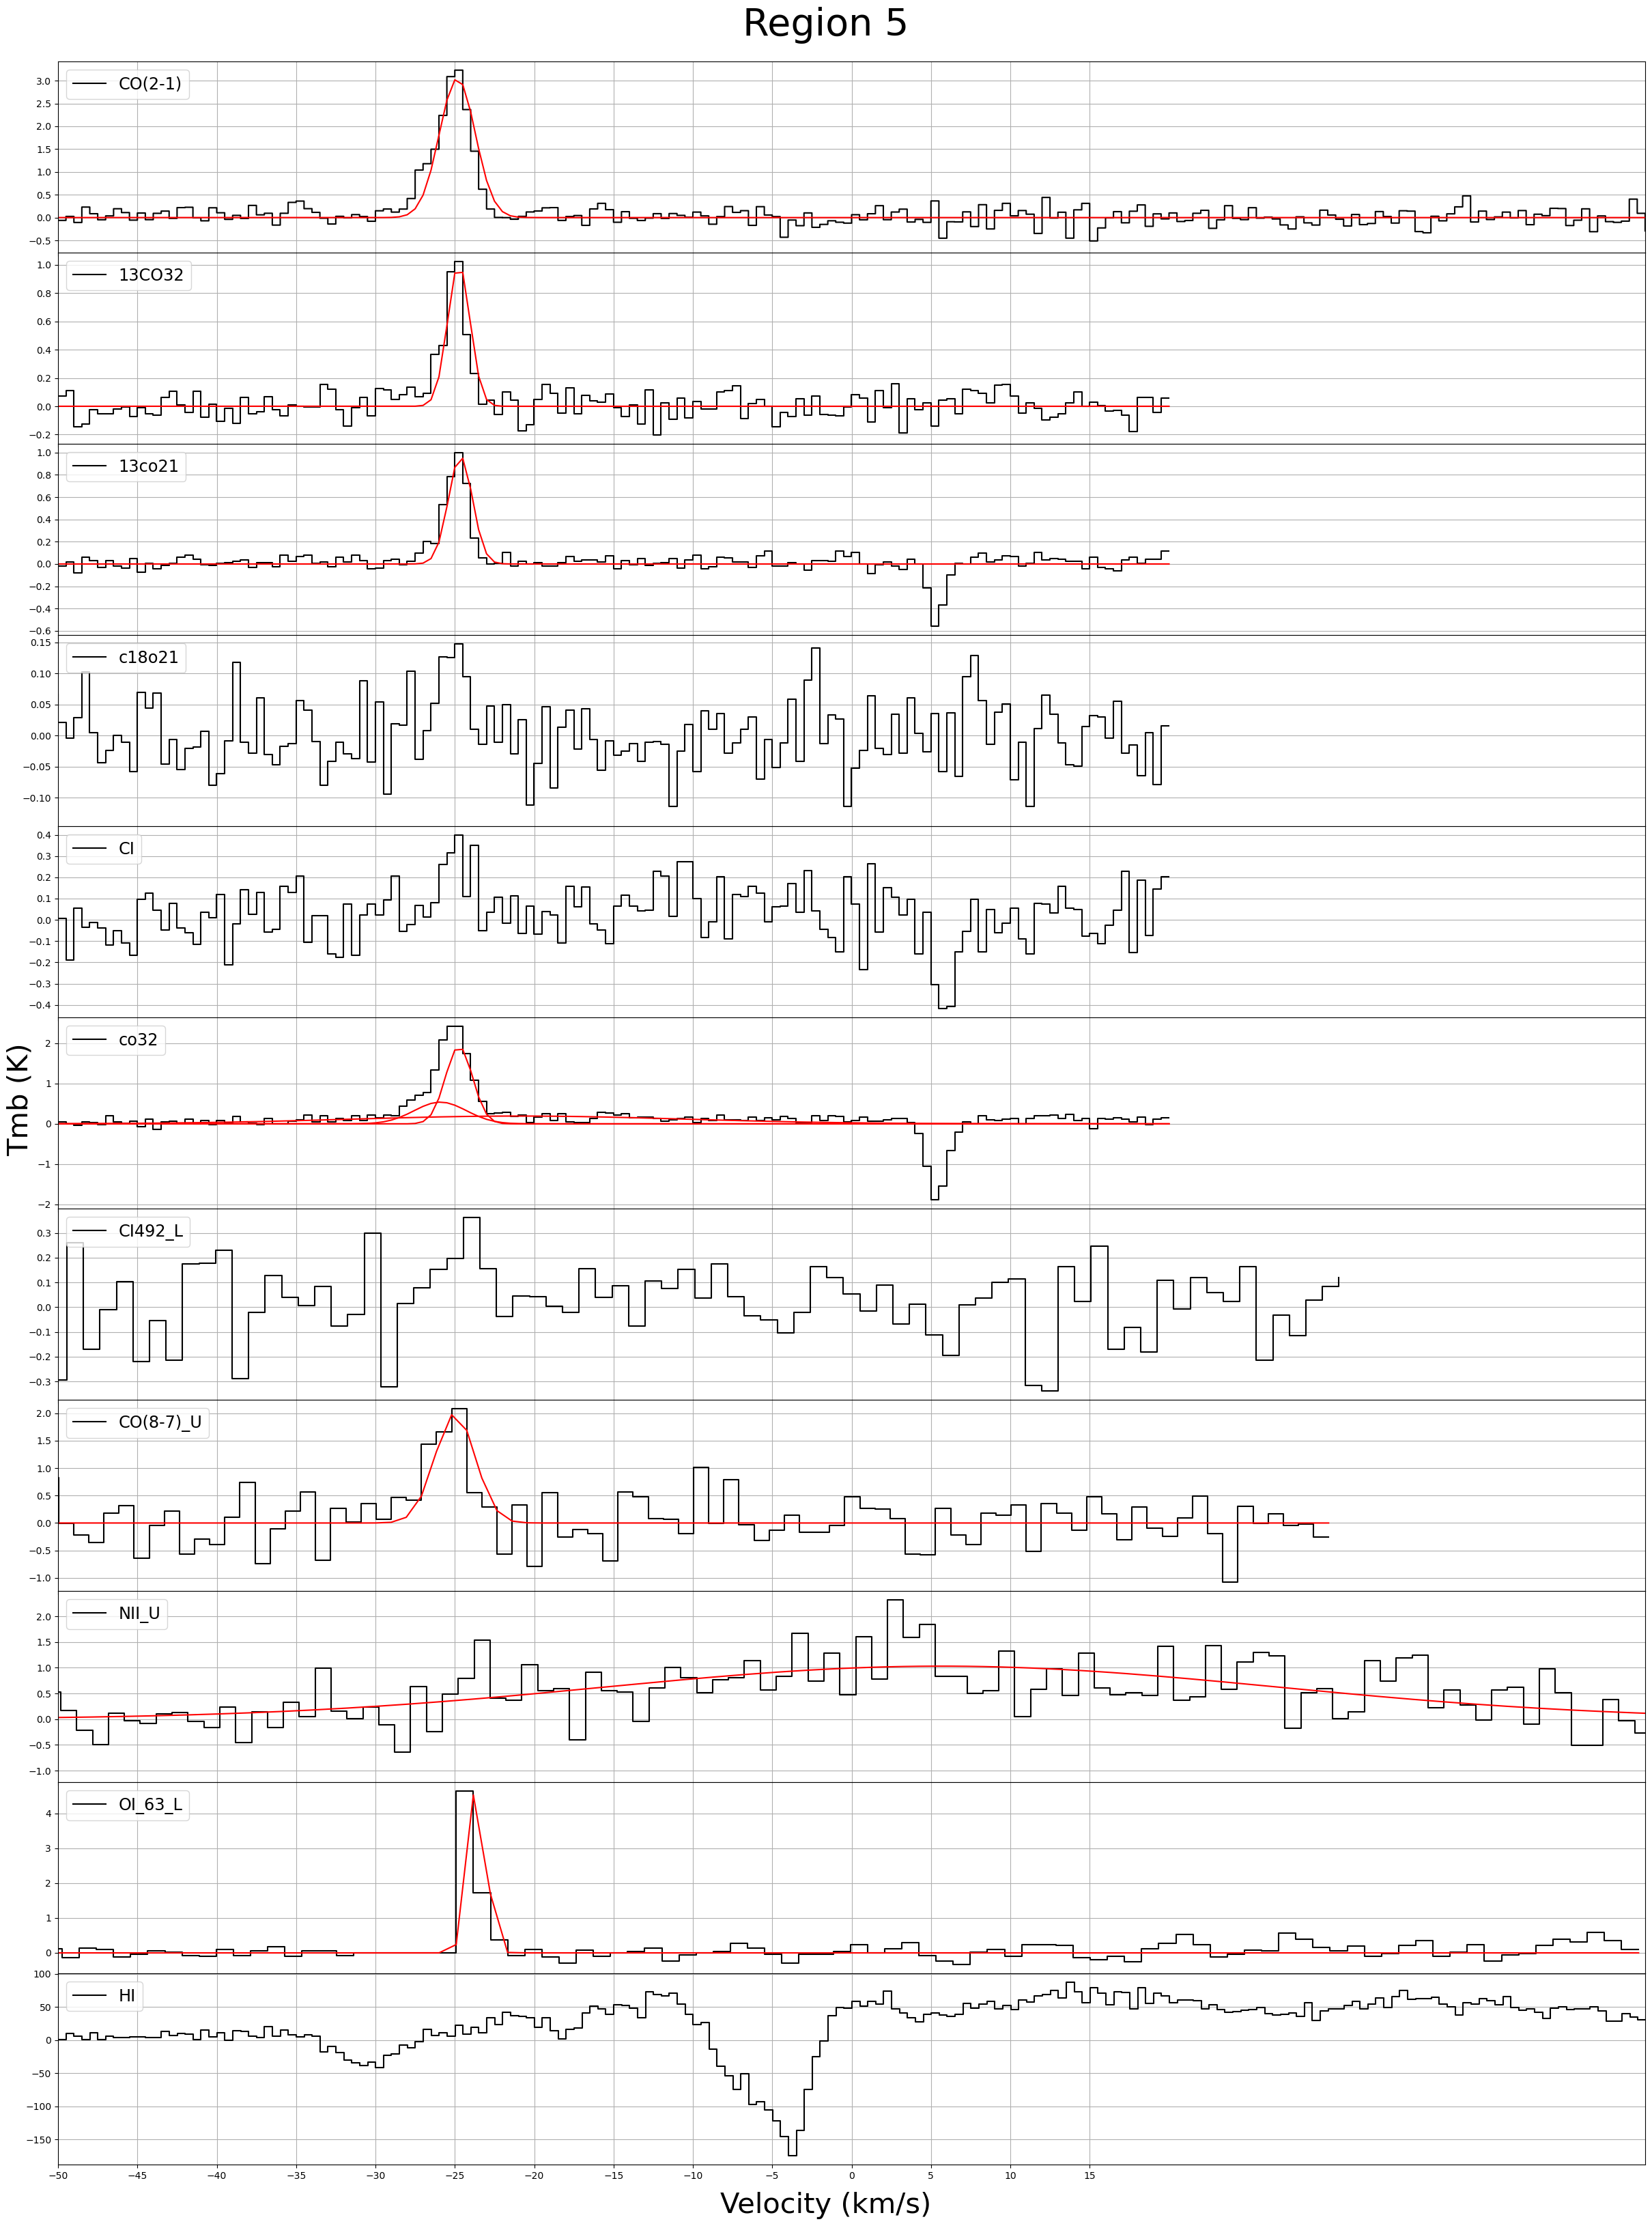

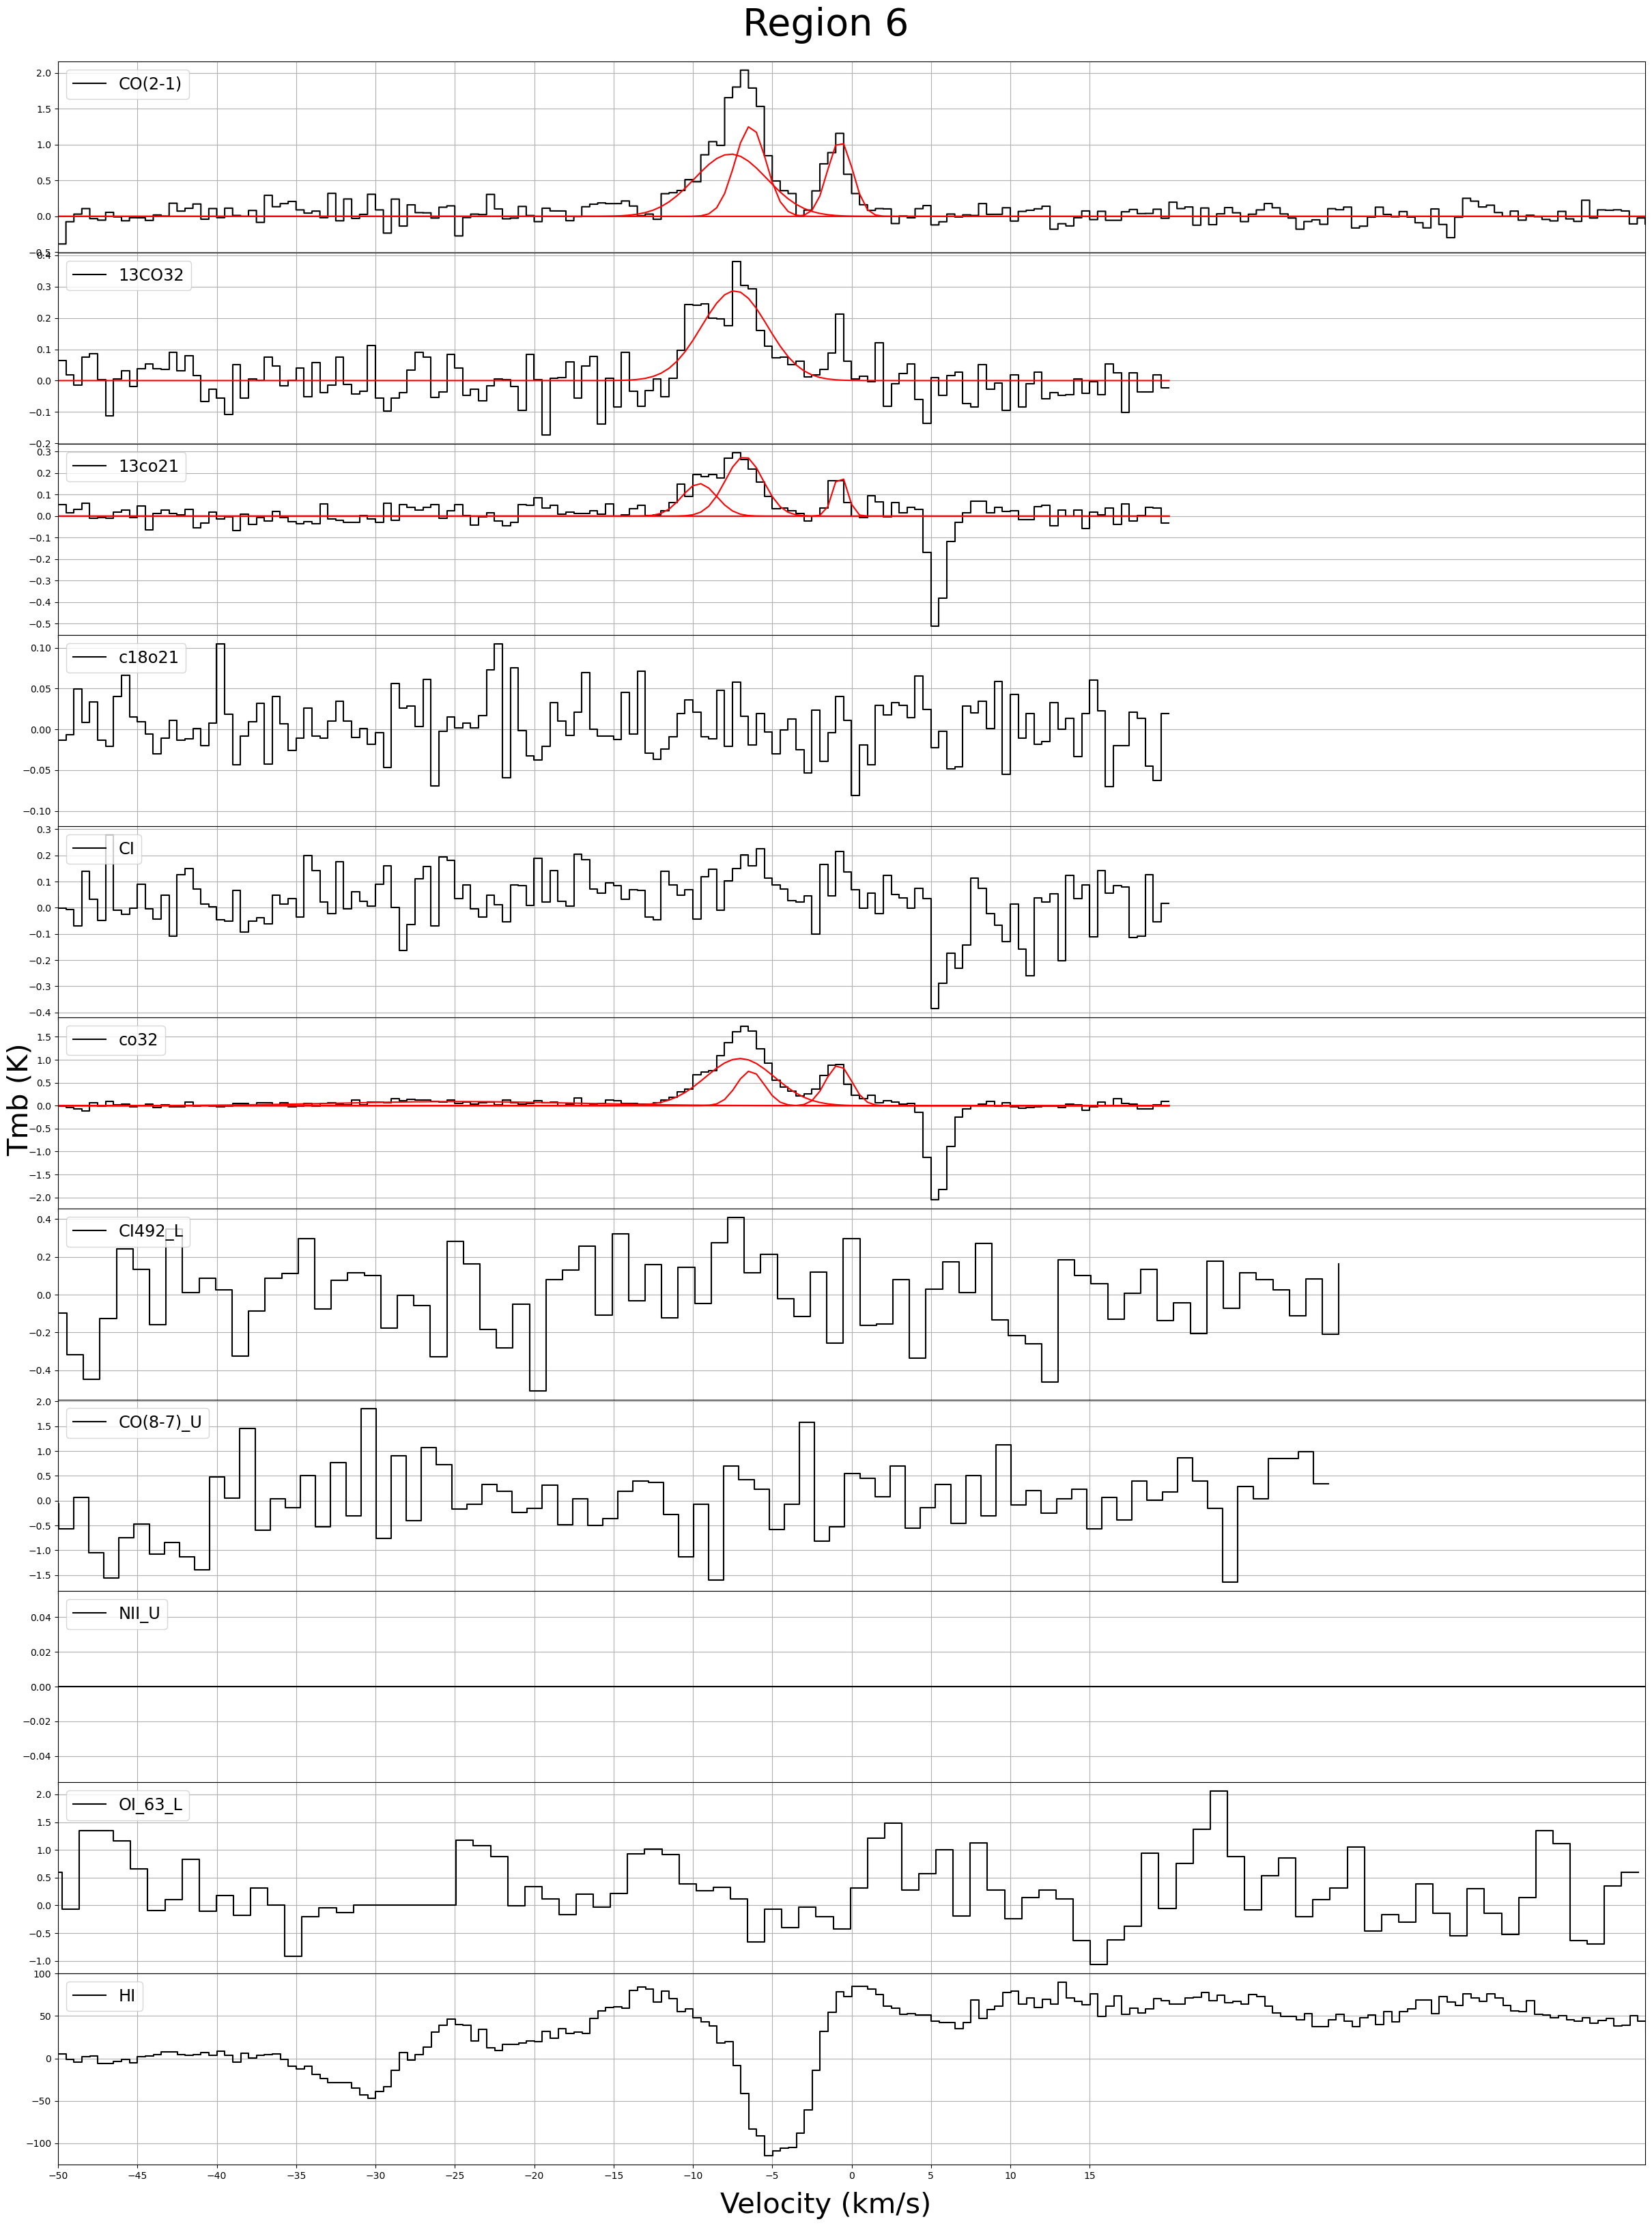

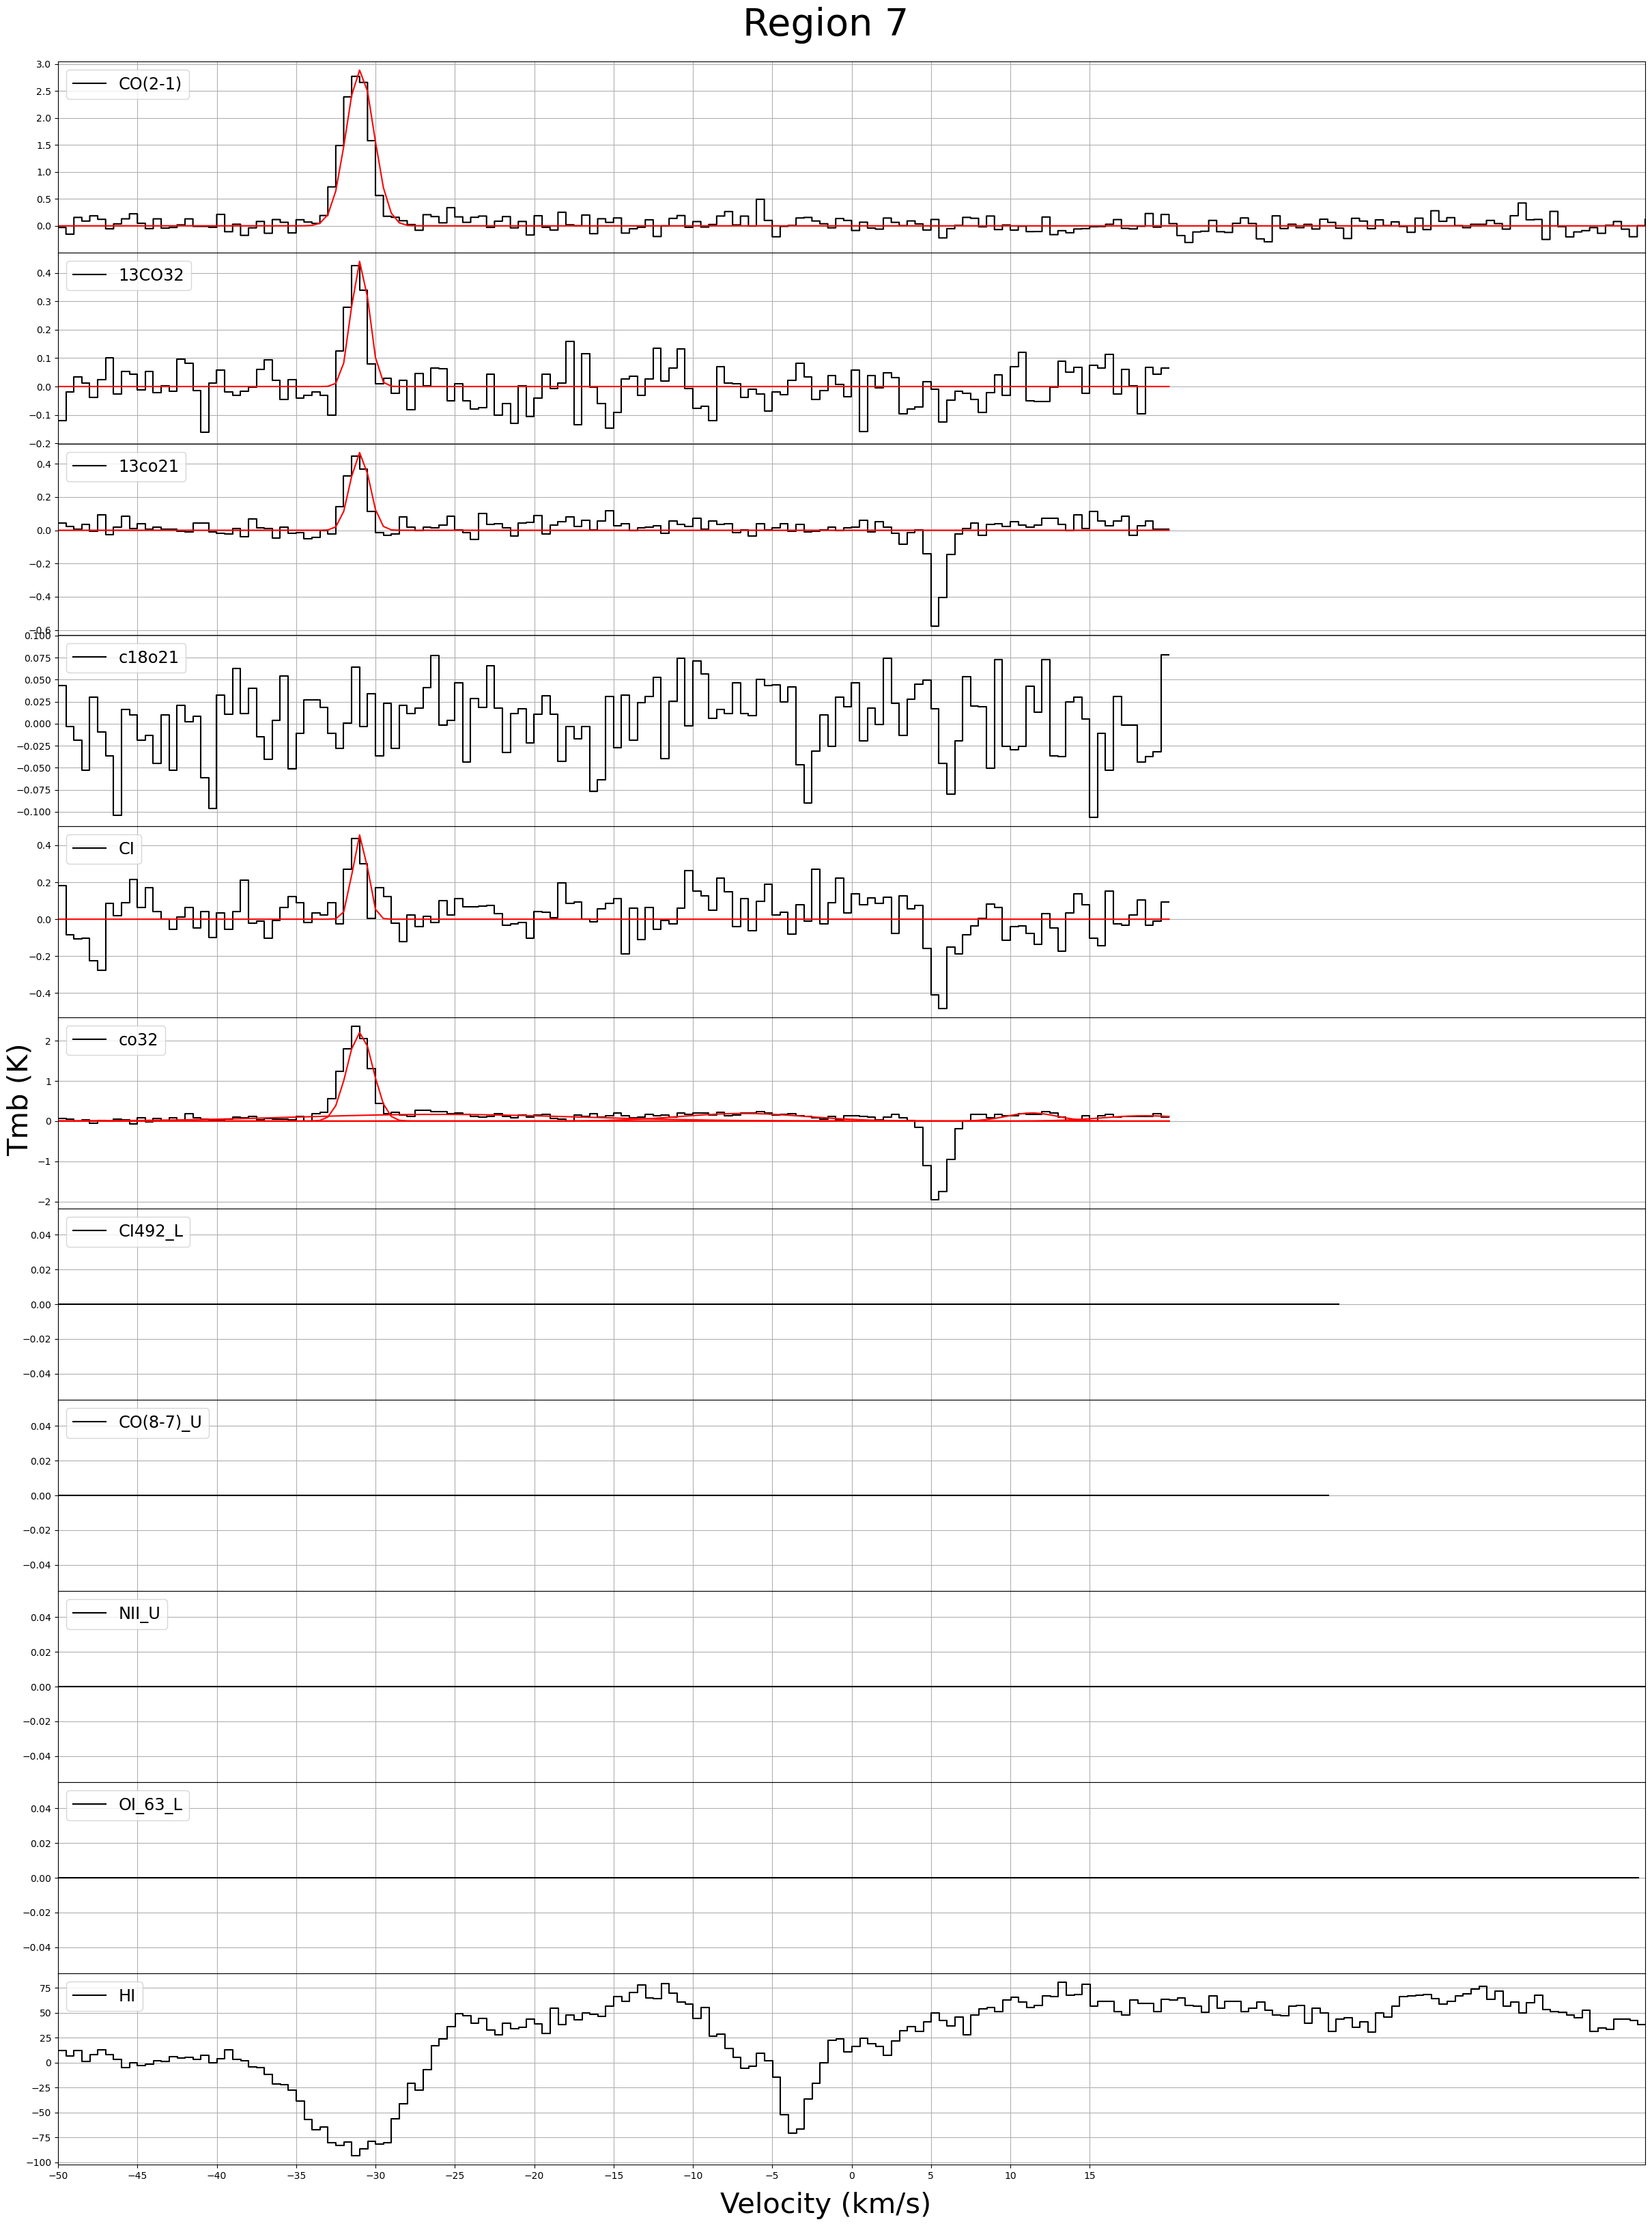

In [14]:
def gaussian(amp, fwhm, mean):
    return lambda x: amp * np.exp(-4. * np.log(2) * (x-mean)**2 / fwhm**2)

for i in range(7):

    fig = plt.figure(figsize=(30,40))
    gs = fig.add_gridspec(len(line), hspace=0)
    ax = gs.subplots(sharex=True)
    fig.suptitle(reg_no[i],y=0.9,fontsize=40)
    fig.supxlabel('Velocity (km/s)',y=0.09,fontsize=30)
    fig.supylabel('Tmb (K)',x=0.1,fontsize=30)
    
    for j in range(len(line)):
         #12CO
        ax[j].step(spec_axis[line[j]],spectrum[line[j]][reg_no[i]], color='black',label=line[j])
        ax[j].grid('True')
        #ax[0].set_ylabel('Intensity [K]', size=17)
        ax[j].legend(fontsize='xx-large',loc=2)
        ax[j].set_xlim([-50,50])
        ax[j].set_xticks(np.arange(-50,20,5))
        
        spec=np.asarray(spec_axis[line[j]])
        nchannels=len(spec)
        model = np.zeros(nchannels)
        means_fit=amps[line[j]][reg_no[i]]
        for k in range(len(means_fit)):
            if filename[j]=='carina.HI.fits':
                component = gaussian(-amps[line[j]][reg_no[i]][k], fwhms[line[j]][reg_no[i]][k],means[line[j]][reg_no[i]][k])(np.arange(nchannels))
            else:
                component = gaussian(amps[line[j]][reg_no[i]][k], fwhms[line[j]][reg_no[i]][k],means[line[j]][reg_no[i]][k])(np.arange(nchannels))
            model += component
            ax[j].plot(spec, component, color='red', lw=1.5)
    path = '/home/wolf/Documents/Group_Project/Projects'
    save_path = os.path.join(path, 'Output',reg_no[i])
    plt.savefig(save_path)

In [16]:
means_convert

{'CO(2-1)': [[-17.195395364940794, -16.550733648286865],
  [-31.926360889954267, -20.16981034337391, -19.00836000265619],
  [-31.916951921229497],
  [-7.811286870389495, 9.20805969018383, -29.034047301100102],
  [-24.83958103443007],
  [-6.370581172349375, -0.7263397507892648, -7.619669547482715],
  [-30.976067795256483]],
 '13CO32': [[-17.0761386895877],
  [-31.773621676113407, -20.025404566978715, -19.09341473858924],
  [-32.079864762795495],
  [-7.985837042539956],
  [-24.744681517950767],
  [-7.370894575630672],
  [-30.96555555075473]],
 '13co21': [[-17.031920533387954, -18.286884887690924],
  [-31.806544514518464, -19.14864066772634, -20.03315810519689],
  [-31.80157763169438],
  [-7.9976110164977285, 9.348159381832886],
  [-24.646620997466556],
  [-0.7206439770939994, -9.59426357526516, -6.762254662481695],
  [-30.982612703818788]],
 'c18o21': [[-17.014117494736134], [], [], [], [], [], []],
 'CI': [[-16.995783203318943],
  [-31.732616776543978],
  [-32.32240121988992],
  [9.4158

In [17]:
amps_convert

{'CO(2-1)': [[8.743365905964358, 0.6587310963213855],
  [6.083239530576088, 2.0098146143246574, 0.6349469498682406],
  [4.769614598960756],
  [1.9737804504910759, 1.8147579167139385, 0.46434690981077625],
  [3.048516866680607],
  [1.2576573851188877, 1.053712955381035, 0.8679232760552021],
  [2.886997387280773]],
 '13CO32': [[3.374404469401674],
  [0.6273854357989729, 0.4009406955037827, 0.14902339426426706],
  [0.36124805902682955],
  [0.6217079973200869],
  [1.0044665432071016],
  [0.28695757861060706],
  [0.4413593582134825]],
 '13co21': [[3.7136032177331573, 0.07202437509759332],
  [1.0640901064630517, 0.11387159503769982, 0.2168089901590503],
  [0.56661376735585],
  [0.5033316754138007, 0.22985103783224825],
  [0.9667669908258703],
  [0.19346608565347462, 0.15151605856476305, 0.27718387207349104],
  [0.46789212132890035]],
 'c18o21': [[0.40431659976186807], [], [], [], [], [], []],
 'CI': [[1.2716126936345336],
  [0.9180863081017697],
  [0.4026647894590551],
  [0.4626131360059877]

In [18]:
sigma_convert

{'CO(2-1)': [[1.0415151176247817, 4.049888962421277],
  [0.9273107110344558, 1.2752892409871157, 4.928518085683955],
  [0.7743096997548984],
  [1.8060552059379222, 0.9035035271267369, 1.2063792042996142],
  [1.1309372623996372],
  [0.9825082468768495, 0.7868204474911918, 2.275810617187574],
  [0.8807473724255087]],
 '13CO32': [[0.7818849428332318],
  [0.6723606858184453, 0.8391713010791428, 3.346712741900253],
  [0.5415988401704261],
  [1.2820831879262464],
  [0.7071792157839365],
  [2.073290840495814],
  [0.5644501323710646]],
 '13co21': [[0.7552294480939968, 8.007655728417543],
  [0.6193516788927639, 3.9003268812693324, 0.7873258137720368],
  [0.5521115243408445],
  [1.0448442169828671, 0.9151937176657096],
  [0.7577131270291979],
  [0.4540207359675709, 1.091276783687493, 1.1810350682951638],
  [0.6040794169436666]],
 'c18o21': [[0.763567479217761], [], [], [], [], [], []],
 'CI': [[0.7584667120920804],
  [0.530711835016182],
  [1.0724978967096839],
  [0.46006399570905204],
  [],
  [

# Analyzing data

### Optical depth

Combine the bumps in the same signal 

In [27]:
line_reg ={key: {} for key in line}
for i in range(len(line)):
    line_reg[line[i]] = {key: [] for key in reg_no}

## Main beam efficiency
eff = 0.86

for j in range(len(reg_no)):
    for i in range(len(line)):
        line_reg[line[i]][reg_no[j]] = np.asarray(amps_convert[line[i]][j])/eff

sigma_reg ={key: {} for key in line}
for i in range(len(line)):
    sigma_reg[line[i]] = {key: [] for key in reg_no}

for j in range(len(reg_no)):
    for i in range(len(line)):
        sigma_reg[line[i]][reg_no[j]] = sigma_convert[line[i]][j]

velo_reg ={key: {} for key in line}
for i in range(len(line)):
    velo_reg[line[i]] = {key: [] for key in reg_no}

for j in range(len(reg_no)):
    for i in range(len(line)):
        velo_reg[line[i]][reg_no[j]] = means_convert[line[i]][j]

NameError: name 'amps_convert' is not defined

Calculate the excitation temperature using the intensity from CO(2-1) which is known as an optical thick line. 
The excitation temperature calculated below will be used to calculate the optical depth of other lines in seven regions.

In [20]:
from astropy import constants

Transition energy between the levels of species. Data taken from Leiden

In [21]:
T_0 = [16.6, #CO(2-1)
       31.73, #13CO(3-2)
       15.87, #13CO(2-1)
       15.81, #C18O(2-1)
       62.462, #CI(2-1)
       33.19, #CO(3-2)
       23.620, #CI492
       199.11, #CO(8-7)
       188.10, #NII
      227.712, #OI63
      0.0682, #HI
      ]

Calculate the excitation temperature of CO species of each regions based on the assume that CO(2-1) is a thick line, in LTE conditions, we will assume that the Excitation temperature is the same for all species of CO. Tex will be used later to calculate the optical depth 

In [22]:
T_ex = {key: [] for key in reg_no}
E_u = 16.6 #
T_bg = 2.7 #CMB temperature
x1 = np.exp(E_u/T_bg)-1
for i in range(len(reg_no)):
    for j in range(len(line_reg['CO(2-1)'][reg_no[i]])):
        E_r = line_reg['CO(2-1)'][reg_no[i]][j]
        x2 = E_u*x1/((E_r*x1)-E_u)+1
        x3 = E_u/np.log(x2)
        T_ex[reg_no[i]].append(x3)

In [23]:
T_ex 

{'Region 1': [14.202546135030207, 4.77839223820458],
 'Region 2': [11.577357950202158, 6.974558354240192, 4.726566986870816],
 'Region 3': [10.210554774665134],
 'Region 4': [6.925731240626682, 6.706482432330466, 4.320346895347699],
 'Region 5': [8.283380748465039],
 'Region 6': [5.875044182717813, 5.5350802794552845, 5.199493854532871],
 'Region 7': [8.08984950204632]}

In [24]:
def optical_depth(T_0,T_r,T_ex):
    J_v = 1/(np.exp(T_0/T_ex)-1)
    J_0 = 1/(np.exp(T_0/T_bg)-1)
    y = T_0*(J_v - J_0)
    try:
        opt_dep = -np.log(1-T_r/y)
    except:
        opt_dep = -2
    return opt_dep

In [25]:
opt_dep ={key: {} for key in line}
for i in range(len(line)):
    opt_dep[line[i]] = {key: [] for key in reg_no}

for l in range(len(line)):
    for j in range(len(reg_no)):
        for k in range(len(line_reg[line[l]][reg_no[j]])):
            T_r = line_reg[line[l]][reg_no[j]][k] 
            T_0_ = T_0[l]
            try:
                optdep_value = optical_depth(T_0_,T_r,T_ex[reg_no[j]][k])
            except:
                optdep_value = -1
            opt_dep[line[l]][reg_no[j]].append(optdep_value)

In [26]:
opt_dep['13co21']

{'Region 1': [0.5384384110410388, 0.11949387744880419],
 'Region 2': [0.18735319244519572, 0.0568214597169607, 0.43570123580035663],
 'Region 3': [0.12306511989792115],
 'Region 4': [0.28591197715811234, 0.13200050768871707],
 'Region 5': [0.3689047555453371],
 'Region 6': [0.1644389857436201, 0.15413921785752843, 0.38718142960531726],
 'Region 7': [0.17157836291382345]}

### Data

### Column Density

The constant will be calculated in cgs units

In [27]:
h = constants.h.cgs
k_b = constants.k_B.cgs
c = constants.c.cgs

#### Partition function
To calculate the partition function function, we will make a statistical sum of all energy level of CO
$$ Q = \Sigma g_i e^{-\frac{E_i}{kT}}$$

CO is dominated by rotational energy

In [28]:
def partition_function(g, Ei, T):
    return g*np.exp(-h*c*Ei/(k_b*T))

The data file is curl from Leiden atomic and molecular database

In [29]:
part_data = "Data/co.dat" 
df = pd.read_table(part_data,skiprows=7,usecols=[1,2],nrows=41,names=['E','g'],delim_whitespace=True)

In [37]:
Q_rot = {key: [] for key in reg_no}
for i in range(len(reg_no)):
    for j in range(len(T_ex[reg_no[i]])):
        T = T_ex[reg_no[i]][j]
        Q = 0
        for k in range(len(df['E'])):
            Q = Q + partition_function(df['g'][k],df['E'][k]/u.cm,T*u.K)
        Q_rot[reg_no[i]].append(Q)

In [41]:
amps['13co21']

{'Region 1': [3.7136032177331573, 0.07202437509759332],
 'Region 2': [1.0640901064630517, 0.11387159503769982, 0.2168089901590503],
 'Region 3': [0.56661376735585],
 'Region 4': [0.5033316754138007, 0.22985103783224825],
 'Region 5': [0.9667669908258703],
 'Region 6': [0.19346608565347462, 0.15151605856476305, 0.27718387207349104],
 'Region 7': [0.46789212132890035]}

#### Calculation Terms
Constants term
$$ \gamma = \frac{8 \pi k_B \nu^2}{hc^3 A_ul} $$
Partition function
$$ Q = \Sigma g_i e^{-\frac{E_i}{kT}}$$
Correction factor
$$ \tau_{term} = \frac{\tau}{1-e^{-\tau}} $$
Moment zero
$$ M = \int {T_{mb}} dv $$

**Column density**
$$ N = \frac{8 \pi k_B \nu^2}{hc^3 A_ul} \frac{Q_{rot}}{g_u} exp(\frac{E_u}{k_B T_{ex}}) \frac{\tau}{1-e^{-\tau}} \int T_{mb} dv$$
<br>
$$ N = \gamma \times \frac{Q}{g_u} \times \tau_{term} \times M$$

In [ ]:
for i in range(7):
    try: 
        opt_dep['13co21'][reg_no[i]].remove(0)
    except:
        pass

In [ ]:
f_co = ( 230.5380000*10**9 )/u.s
Aul = 6.910e-07/u.s
gu = 5.0
T_Eu = 16.60*u.K # T_Eu = Eu/kb 
gamma = 8*np.pi*k_b*(f_co**2)/(h*(c**3)*Aul)
#def moment_0(mean,sigma):
#    return lambda y: 1/(2*np.sqrt(2)*sigma)*m.erf((y-mean)/(m.sqrt(2)*sigma))

In [ ]:
Column_den = {key: [] for key in reg_no}
moment_0 = {key: [] for key in reg_no}
for i in range(len(reg_no)):
    for j in range(len(means_convert['13co21'][i])):
        Q = Q_rot[reg_no[i]][j] #partition function
        T = T_ex[reg_no[i]][j]*u.K #excitation temperature
        sigma = sigma_convert['13co21'][i][j]
        mean = means_convert['13co21'][i][j]
        M = spectrum['13co21'][reg_no[i]][:]*u.K*50000*u.cm/u.s
        m = M.sum() #moment 0, integral of Tmb over velocity
        tau = opt_dep['13co21'][reg_no[i]][j] 
        tau_term = tau/(1-np.exp(-tau))
        moment_0[reg_no[i]].append(m)
        #Col_den = 8*np.pi*k_b*f_co**2/(h*c**3*Aul) * Q/gu * np.exp(Eu/k_b*T) * (moment_0(mean, sigma)(-50) - moment_0(mean, sigma)(50))
        Col_den = gamma * Q/gu * np.exp(T_Eu/T) * tau_term * m
        Column_den[reg_no[i]].append(Col_den)

The result of column density is in the range of 10e15 which is pretty compatible. <br>
Now we take the maximum value of the region.

In [ ]:
def N12_fun(n13):
    return 65*n13
def N_H2_fun(n13):
    return 65*n13/1e-4
def N_H2_fun2(n13):
    return 5e21*n13/(2.7*1e15*3.1)
    #return 0.94*1e21*n13/(2.5*1e15)

In [ ]:
N13 = {key: [] for key in reg_no}
N12 = {key: [] for key in reg_no}
N_H2 = {key: [] for key in reg_no}
N_H2_av = {key: [] for key in reg_no}
for i in range(len(reg_no)):
    m = max(Column_den[reg_no[i]])
    N13[reg_no[i]].append(m)
    N12[reg_no[i]].append(N12_fun(m))
    N_H2[reg_no[i]].append(N_H2_fun(m))
    N_H2_av[reg_no[i]].append(N_H2_fun2(m)) 

In [ ]:
N13

In [ ]:
for i in range(7):
    print(N_H2[reg_no[i]][0]/N_H2_av[reg_no[i]][0])

In [ ]:
N_H2_av

### Mass of Molecular Cloud

### Mass of Molecular Cloud

Most of particles in atomic cloud is H and in molecular cloud is H2. We can assume that there is 90% H + 10% He in our atomic cloud. So, we assume that the equivalent mass of a mixed particle with $ 87\%mp + 13\%(4mp)$ (we denote $mH = mp$, because Hydrogen molecular has only 1 proton). Thus,
$$ m_{equi} = \mu * m_{H}$$
where $\mu = 1.4$.<br>
So with molecular cloud $\mu = 2*1.4 = 2.8$
$$ M_{gas} = \pi R_{equi}^2 \times N_{H_2} \times m_{equi}$$
wher $R_{equi} = \sqrt{a \times b}$ with $a, b$ are height and width of eliptical regions.

In [ ]:
mH = constants.u.cgs
pc = constants.pc.cgs
dis = 2600*pc
M_sun = 1.989 * 10e33 * u.g

In [ ]:
def Mass_fun(n_gas,a=1,b=1,muy=2.8,mH = mH):
    return np.pi * (a*b) * n_gas * muy * mH

In [ ]:
rad = list()
height = list()
width = list()
for i in range(3):
    r = region_list[i].radius 
    rad.append(r.to(u.radian)*dis/u.rad)
for i in range(3,7):
    h = region_list[i].height
    w = region_list[4].width
    height.append(h.to(u.radian)*dis/u.rad)
    width.append(w.to(u.radian)*dis/u.rad)

In [ ]:
M_gas = {key: [] for key in reg_no}
M_g_s = {key: [] for key in reg_no}
for i in range(3):
    M_gas[reg_no[i]].append(Mass_fun(N_H2[reg_no[i]][0],a = rad[i],b = rad[i]))
for i in range(3,7):
    M_gas[reg_no[i]].append(Mass_fun(N_H2[reg_no[i]][0],a = height[i-3],b = width[i-3]))
for i in range(7):
    M_g_s[reg_no[i]].append(M_gas[reg_no[i]][0]/M_sun)

In [ ]:
M_gas

In [ ]:
M_g_s

In [ ]:
def value_convert(dict_name):
    for i in range(7):
        dict_name[reg_no[i]][0] = dict_name[reg_no[i]][0].value

In [ ]:
files = [N13,N_H2,N_H2_av,M_gas,M_g_s]
for file in files:
    try:
        value_convert(file)
    except:
        pass

In [ ]:
data = [N13,N_H2,N_H2_av,M_gas,M_g_s]
dataframes = []
for datum in data:
    dataframes.append(pd.DataFrame(datum))
df = pd.concat(dataframes).T
df.columns = ['N(13)','N(H2)','N(H2) (Av)','M gas','M gas/M sun']